In [1]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/Erin/Dropbox/Schoolwork/Vanderbilt/Lopez Lab/Project Specific/Mass Spec Analysis')

In [4]:
data = pd.read_csv('2016_03_18_HeLa_timecourse_quantitation_signalnoise_checked.csv')

In [5]:
data.set_index(['Protein Name', 'Peptide Sequence', 'Replicate Name'], inplace=True)
data

Light Area  Heavy Area  \
Protein Name          Peptide Sequence Replicate Name                           
sp|Q07812|BAX_HUMAN   EVFFR            2dRT                393377      235043   
                                       1d1ul               224020      112638   
                                       1ul-baseline        120412      152450   
                                       1                   257026      500980   
                                       2                    57621       33518   
                                       3                    69880       45491   
                                       4                   252827      457895   
                                       5                   123118      265359   
                                       6                   117973      254772   
                                       7                   124126      238457   
                                       heavy-scout         424156      424156   
                      VPELIR           2dRT                190941      219189   
                                       1d1ul               266027      125902   
                                       1ul-baseline         77269      135465   
                                       1                   110548      344857   
                                       2                    47518      233947   
                                       3                   133088      289343   
                                       4                    93927      265415   
                                       5                    22642      193913   
                                       6                    70798      168181   
                                       7                   186102      186353   
                                       heavy-scout         488154      488154   
sp|Q07817|B2CL1_HUMAN EVIPMAAVK        2dRT                104939      137026   
                                       1d1ul               153271       24156   
                                       1ul-baseline        426069       50655   
                                       1                   650194      268458   
                                       2                   527184      185801   
                                       3                   687961      232603   
                                       4                   504330      260308   
                                       5                   233139      142197   
...                                                           ...         ...   
sp|Q92934|BAD_HUMAN   VFQSWWDR         1                    13338      187003   
                                       2                    16668      137407   
                                       3                    13650      107773   
                                       4                     8032      168161   
                                       5                     5098      106261   
                                       6                    12081       77738   
                                       7                     8723       82102   
                                       heavy-scout         229137      229137   
sp|Q16611|BAK_HUMAN   QLAIIGDDINR      2dRT                 31985       43779   
                                       1d1ul                49942      235945   
                                       1ul-baseline        120026      146454   
                                       1                    88464      140123   
                                       2                    65565       80852   
                                       3                    96567      106565   
                                       4                    31673       73697   
                                       5                    59511      108268   
                                       6                    45815       75699   
     

In [6]:
test = data.index.get_level_values(0)[0]
test

'sp|Q07812|BAX_HUMAN'

In [7]:
data.sort_index(level=0, inplace=True)

In [8]:
test_data = data.loc[test]
peptides = test_data.index.get_level_values(0)
pep_data = test_data.loc[peptides[0]]
pt = pep_data.lookup(['1', '2'], ['Average Protein Copy Number per Cell']*2)
pt

array([  29226.0145056,  126356.861697 ])

In [9]:
peptides.drop_duplicates()[0]

'EVFFR'

In [10]:
proteins = data.index.get_level_values(0).drop_duplicates()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


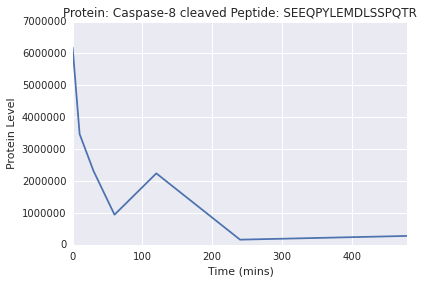

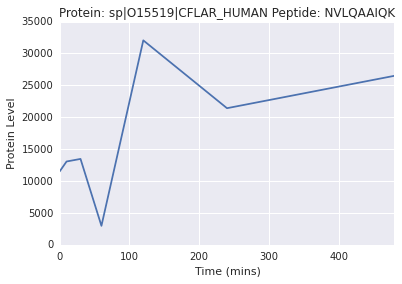

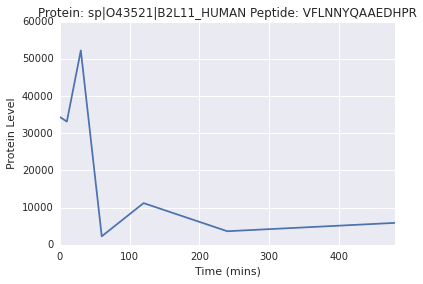

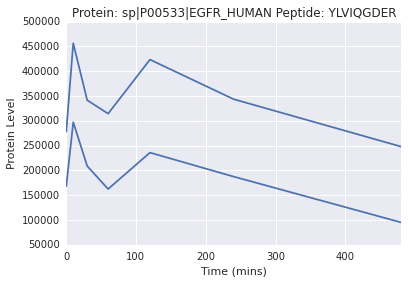

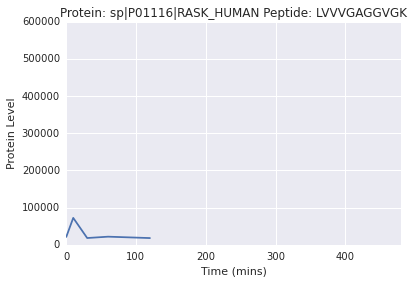

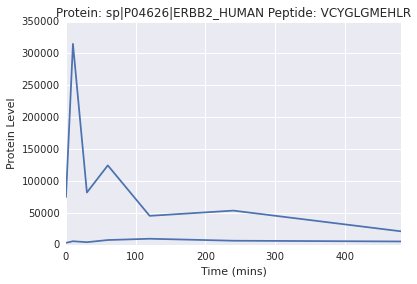

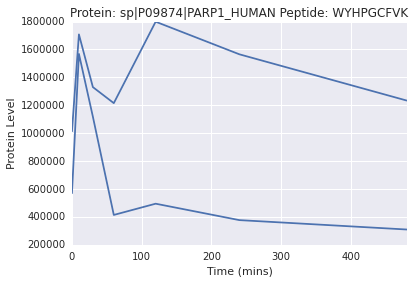

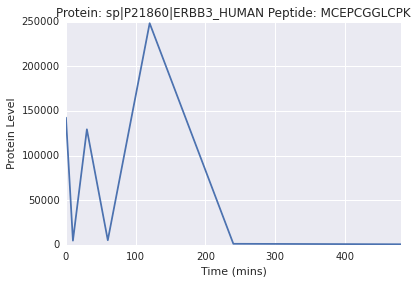

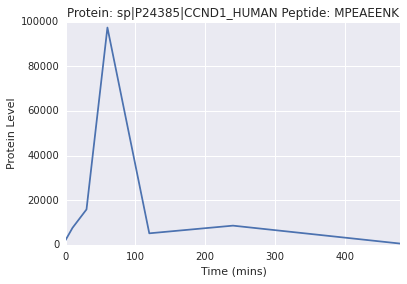

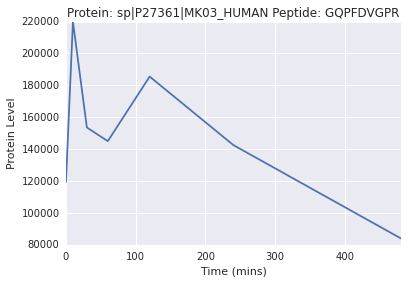

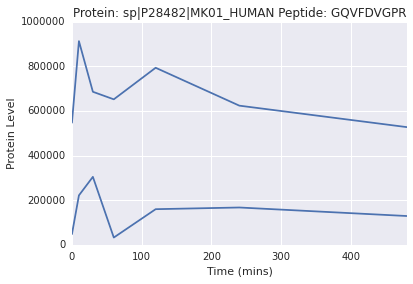

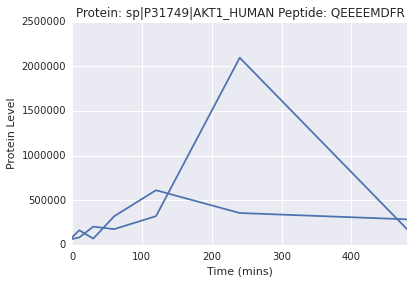

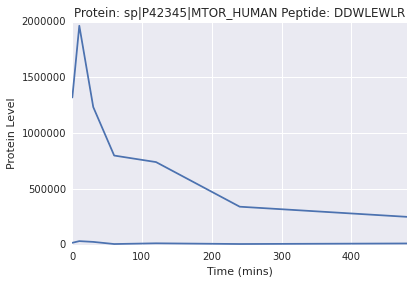

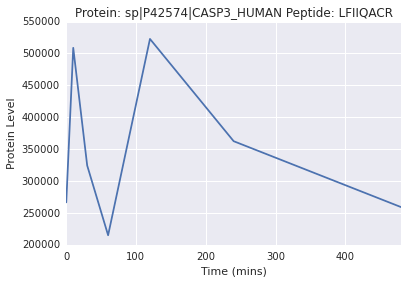

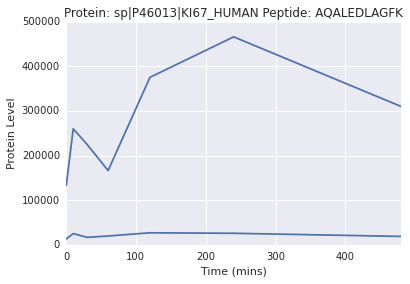

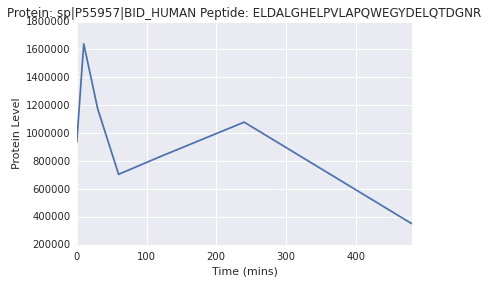

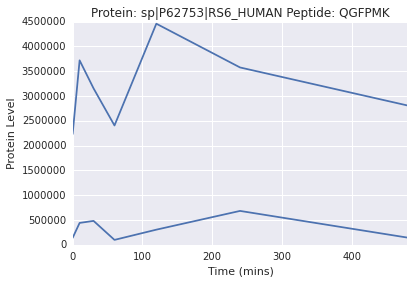

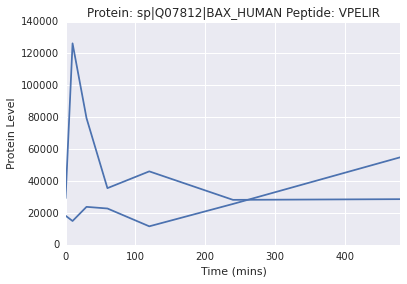

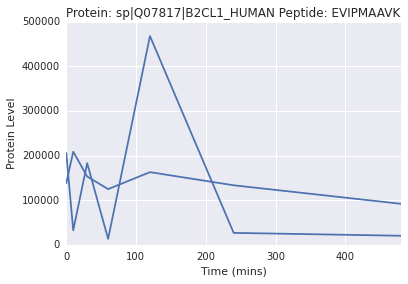

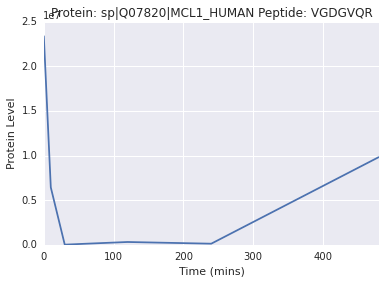

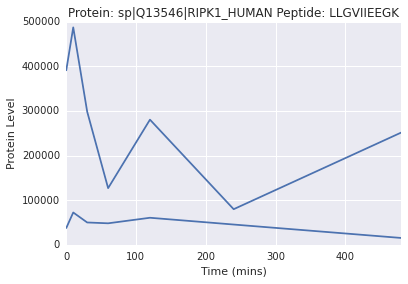

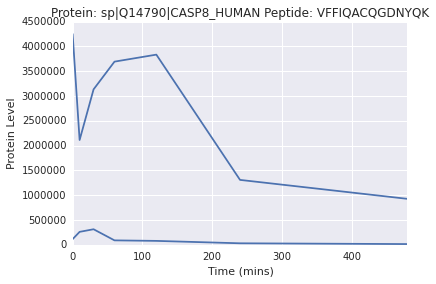

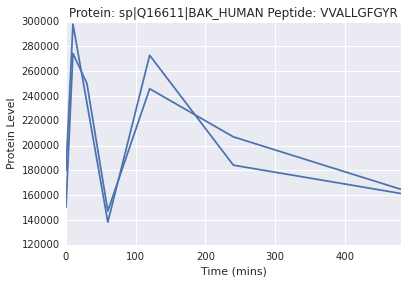

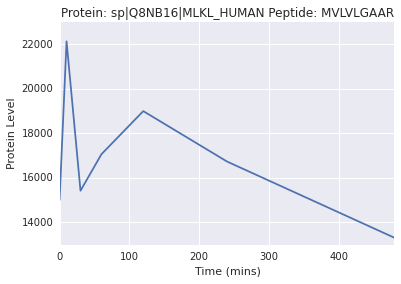

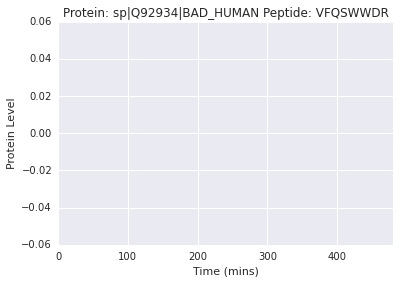

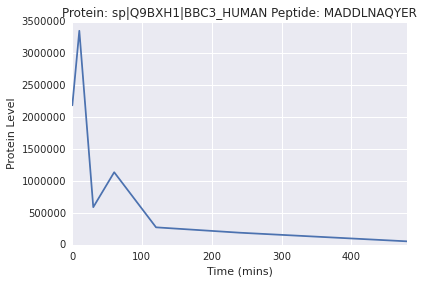

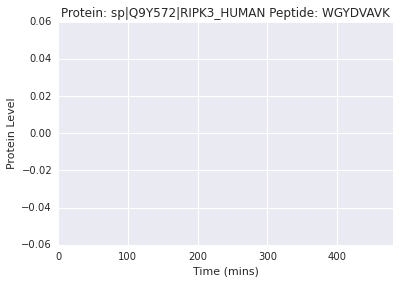

In [11]:
time_labels = [str(val) for val in range(1, 8)]
time_vals = np.array([0, 10, 30, 60, 120, 240, 480])
n_times = len(time_labels)
for protein in proteins:
    fig = plt.figure()
    protein_data = data.loc[protein]
    peptides = protein_data.index.get_level_values(0).drop_duplicates()
    pep_time_course_data = {}
    for peptide in peptides:
        pep_data = protein_data.loc[peptide]
        pep_time_course_data[peptide] = pep_data.lookup(row_labels=time_labels, col_labels=['Average Protein Copy Number per Cell']*n_times)
    ax = sns.tsplot(data=pep_time_course_data[pep_time_course_data.keys()[0]], time=time_vals)
    if len(pep_time_course_data.keys()) > 1:
        for key in pep_time_course_data.keys()[1::]:
            sns.tsplot(data=pep_time_course_data[key], time=time_vals, ax=ax)
            
    ax.set_xlabel('Time (mins)')
    ax.set_ylabel('Protein Level')
    ax.set_title('Protein: '+str(protein)+' Peptide: '+str(peptide))